In [ ]:
import pandas as pd

# Load dataset

df = pd.read_csv("/content/daily-foreign-exchange-rates-31-.csv")

# Show first few rows
df.head(20)


,Date,"Daily foreign exchange rates, 31 December 1979 ? 31 December 1998"
0,1979-12-31,1.726
1,1980-01-02,1.714
2,1980-01-03,1.711
3,1980-01-04,1.713
4,1980-01-07,1.708
5,1980-01-08,1.713
6,1980-01-09,1.712
7,1980-01-10,1.717
8,1980-01-11,1.721
9,1980-01-14,1.719


In [ ]:
df.shape

(4775, 2)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Print column names to check the exact format
print(df.columns)

# Rename columns (modify based on actual structure)
df.columns = ["Date", "Exchange_Rate"]

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Convert Exchange Rate column to numeric (in case of string values)
df["Exchange_Rate"] = pd.to_numeric(df["Exchange_Rate"], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Sort by Date (if not already sorted)
df = df.sort_values(by="Date")

# Reset index
df = df.reset_index(drop=True)

# Print cleaned dataset preview
print(df.head())


Index(['Date', 'Exchange_Rate'], dtype='object')
        Date  Exchange_Rate
0 1979-12-31          1.726
1 1980-01-02          1.714
2 1980-01-03          1.711
3 1980-01-04          1.713
4 1980-01-07          1.708


In [ ]:
# Normalize exchange rate values
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(df["Exchange_Rate"].values.reshape(-1, 1))

# Sequence length for RNN
SEQ_LENGTH = 10

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create input (X) and target (y) sequences
X, y = create_sequences(data, SEQ_LENGTH)

# Split into training (80%) and testing (20%)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape X to fit RNN input (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], SEQ_LENGTH, 1)
X_test = X_test.reshape(X_test.shape[0], SEQ_LENGTH, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model = Sequential([
    SimpleRNN(20, activation='tanh', input_shape=(SEQ_LENGTH, 1)),
    Dense(1)  # Predicts the next exchange rate
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


239/239 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1397 - val_loss: 1.5540e-04
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1312e-04 - val_loss: 5.3735e-05
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.6433e-04 - val_loss: 6.6881e-05
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.3995e-04 - val_loss: 8.3190e-05
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.4042e-04 - val_loss: 5.8989e-05
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3658e-04 - val_loss: 6.8674e-05
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2084e-04 - val_loss: 5.3394e-05
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1648e-04 - val_loss: 5.4644e-05
Epoch 9/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2181e-04 - val_loss: 4.3475e-05
Epoch 10/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2330e-04 - val_loss: 5.4543e-05


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


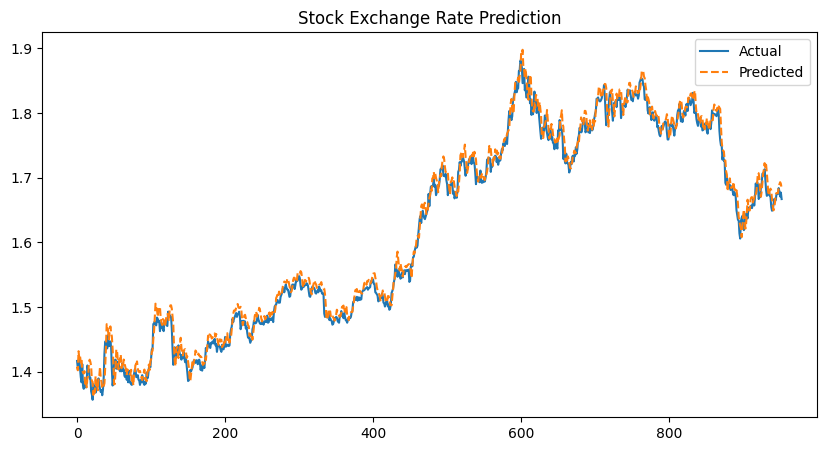

In [ ]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Reverse scaling to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Plot Actual vs. Predicted Exchange Rates
plt.figure(figsize=(10, 5))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted', linestyle='dashed')
plt.legend()
plt.title("Stock Exchange Rate Prediction")
plt.show()


In [ ]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1408e-05
Test Loss (MSE): 0.0001


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Reverse scaling to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test_actual, y_pred_actual)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate R² Score (1 = perfect prediction, closer to 0 means poor prediction)
r2 = r2_score(y_test_actual, y_pred_actual)
print(f"R² Score: {r2:.4f}")


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Mean Absolute Error (MAE): 0.0121
R² Score: 0.9897
